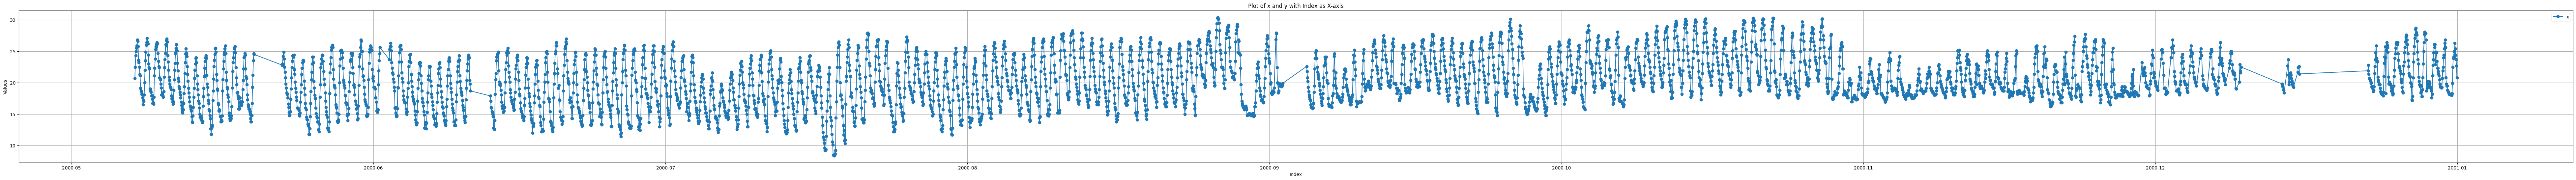

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
file_path = "E:/PC/Documentos/GitHub/fourrier-analysis-of-weather-data/INMET_CO_DF_A001_BRASILIA_07-05-2000_A_31-12-2000.CSV"

df = pd.read_csv(file_path, sep=';',decimal=',')
df = df[["DATA (YYYY-MM-DD)","HORA (UTC)","TEMPERATURA M�NIMA NA HORA ANT. (AUT) (�C)", "TEMPERATURA M�XIMA NA HORA ANT. (AUT) (�C)"]]
df['datetime'] = pd.to_datetime(df['DATA (YYYY-MM-DD)'] + ' ' + df['HORA (UTC)'])
df.set_index('datetime', inplace=True)
df.drop(columns=["DATA (YYYY-MM-DD)","HORA (UTC)"], inplace=True)
df.replace(-9999, np.nan, inplace=True)
df = df.dropna()

# display(df)

def plot():
    plt.figure(figsize=(100, 6))

    # Plot the 'x' column
    plt.plot(df.index, df["TEMPERATURA M�NIMA NA HORA ANT. (AUT) (�C)"], marker='o', linestyle='-', label='x')

    # Plot the 'y' column
    # plt.plot(df.index, df["TEMPERATURA M�XIMA NA HORA ANT. (AUT) (�C)"], marker='s', linestyle='-', label='y')

    # Adding titles and labels
    plt.title('Plot of x and y with Index as X-axis')
    plt.xlabel('Index')
    plt.ylabel('Values')

    # Adding a legend
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()
plot()